<center><b><font size='16'>Data Exploration and Model Creation</font></b></center>
We start our project by exploring the dataset to gain insights and identify relationships that will guide us in selecting the most suitable machine learning model. This process involves the following key steps:

1. **Exploratory Data Analysis (EDA):**
   - Analyze and visualize the dataset to uncover patterns, correlations, and anomalies.

2. **Data Processing:**
   - Clean and preprocess the data, including handling missing values, encoding categorical features, and scaling numerical features.

3. **Model Training:**
   - Train multiple machine learning models using the processed data and evaluate their performance.

4. **Optimal Model Selection and Saving:**
   - Select the best-performing model based on evaluation metrics, and save it for future predictions.

Following these steps, we will create a RESTful API endpoint and set up a microservice using Flask to serve our model.


In [1]:
# Importing Training data
import pandas as pd 
import numpy as np 

train=pd.read_excel('train.xlsx')
pd.set_option('display.max_columns',train.columns.size)  # Adjusting to dislplay all columns

In [2]:
train.head()                    # looking at a sample of our data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [3]:
# Finding NaN cells and then filling them with the appropriate values
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
# For numerical values will go with median, while binaries will go with most common
most_common=train.four_g.mode()[0]
train['four_g']=train['four_g'].fillna(most_common)
train.fillna(train.median(),inplace=True)

In [5]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
train.describe()                    # A quick glimpse on some statistics

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.307000,0.522500,32.048000,0.502250,140.268000,4.517000,9.916000,644.490500,1251.283500,2124.285500,12.303500,5.766000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.330835,0.499618,18.123767,0.288169,35.349271,2.286772,6.050888,442.926307,432.136613,1084.730577,4.211325,4.356344,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,946.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



## Insights and Visualization

To gain a deeper understanding of our dataset and guide our feature selection and engineering process, we will explore the data through various visualization techniques:

- **Histograms:**
  - Visualize the distribution of individual features to understand their spread and identify any potential outliers.

- **Heatmaps:**
  - Create correlation heatmaps to identify relationships between different features, helping us understand which features might be most influential in predicting the target variable.

- **Scatter Plots and Pair Plots:**
  - Use scatter plots and pair plots to visualize relationships between pairs of features, which can reveal trends and correlations that are not immediately obvious.

- **Feature Engineering:**
  - Based on the insights gained from our visualizations, we will engineer new features that could enhance the predictive power of our models.

These visualizations will guide us in selecting the most relevant features and transforming the data in ways that improve model performance. Through this comprehensive EDA process, we aim to build a robust foundation for our machine learning models.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# The mean for each price catergory
grouped=train.groupby('price_range')
price_mean=grouped.mean()
price_mean

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.058,0.518,31.226,0.4904,140.616,4.596,9.558,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.344,0.526,32.122,0.5258,140.636,4.292,9.942,667.430,1250.980,1679.780,12.200,5.540,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.002,629.752,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.328,0.552,33.924,0.5020,136.206,4.498,10.162,744.372,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


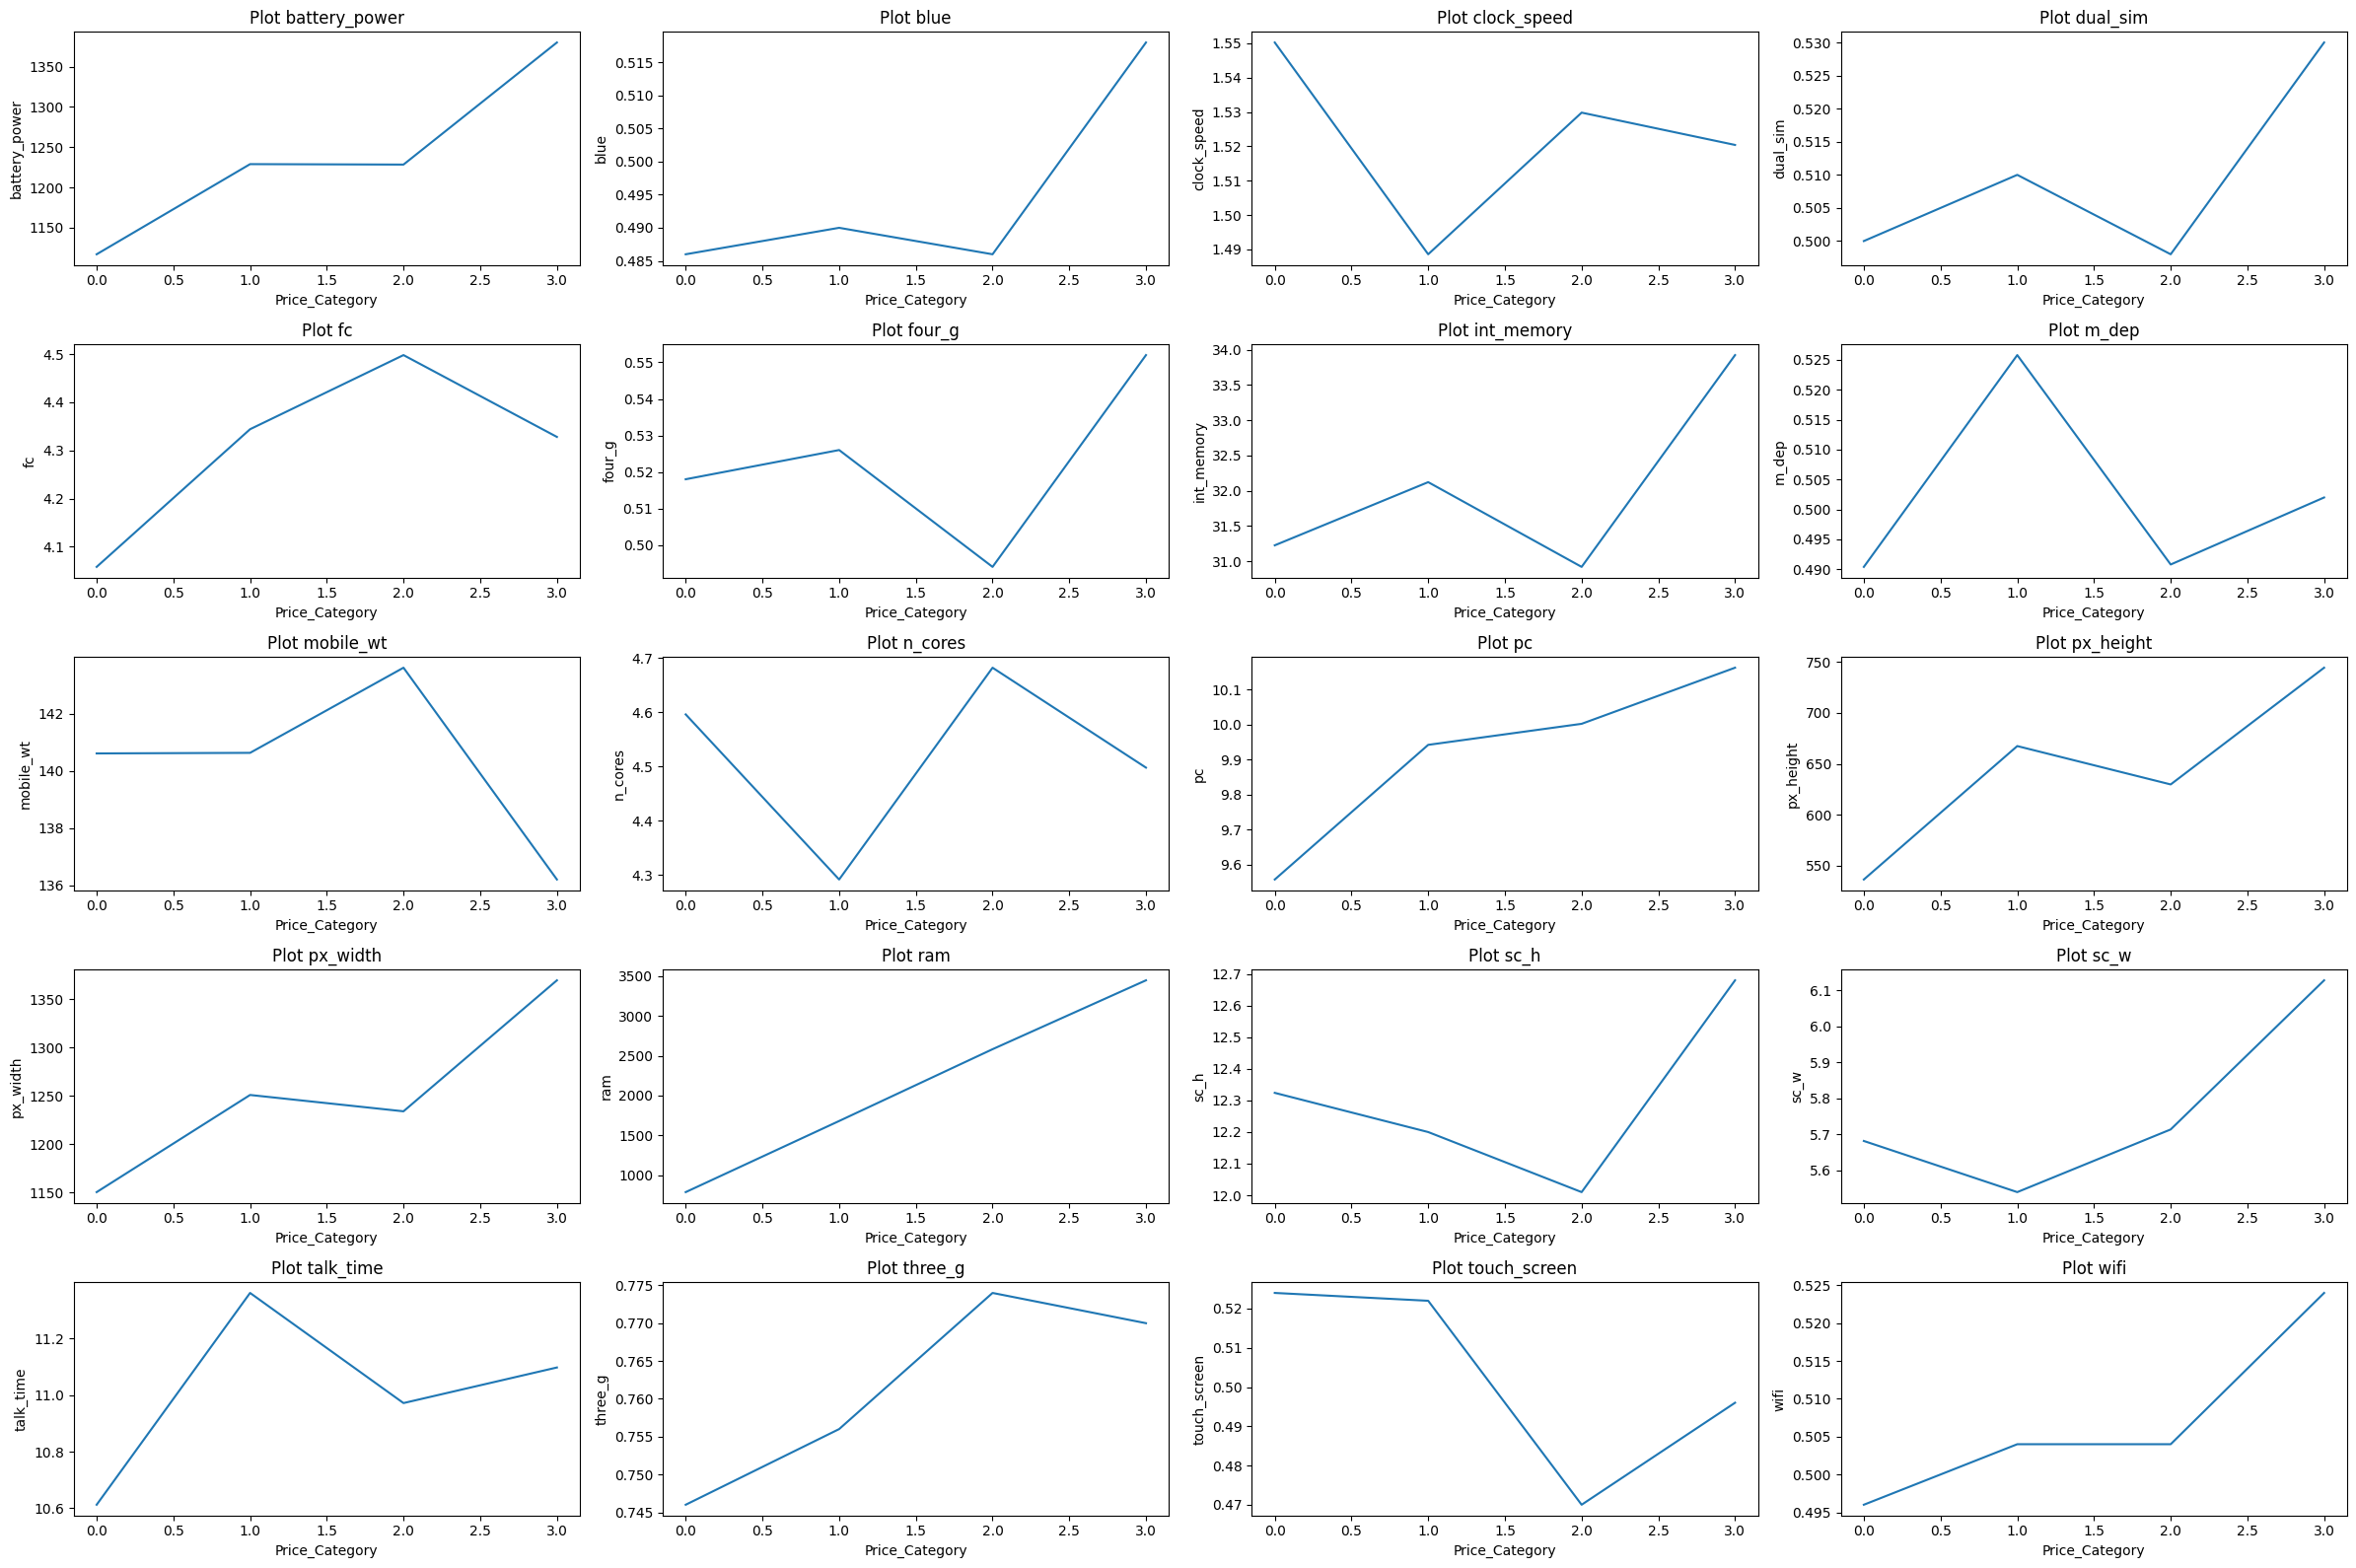

In [9]:
# Create a figure with appropriate size
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 16))  # Adjust rows, cols and figsize as needed

# Flatten the axes for easier iteration
axes_flat = axes.ravel()
columns=price_mean.columns

# Create plots on each subplot
for i in range(20):
  axes_flat[i].plot(price_mean.index,price_mean[columns[i]])
  axes_flat[i].set_title(f"Plot {columns[i]}")
  axes_flat[i].set_ylabel(f'{columns[i]}')
  axes_flat[i].set_xlabel(f'Price_Category')

# Adjust layout (optional)
plt.tight_layout()

plt.show()

We can see that some features have a linear relationship with the price, such as:
- RAM
- Battery Power
- Primary Camera Pixel Count

These features will be very useful and easy to use in the chosen model.

On the other hand, some data, such as touch screen, do not show a clear relationship with the price and may not be as useful for our model.


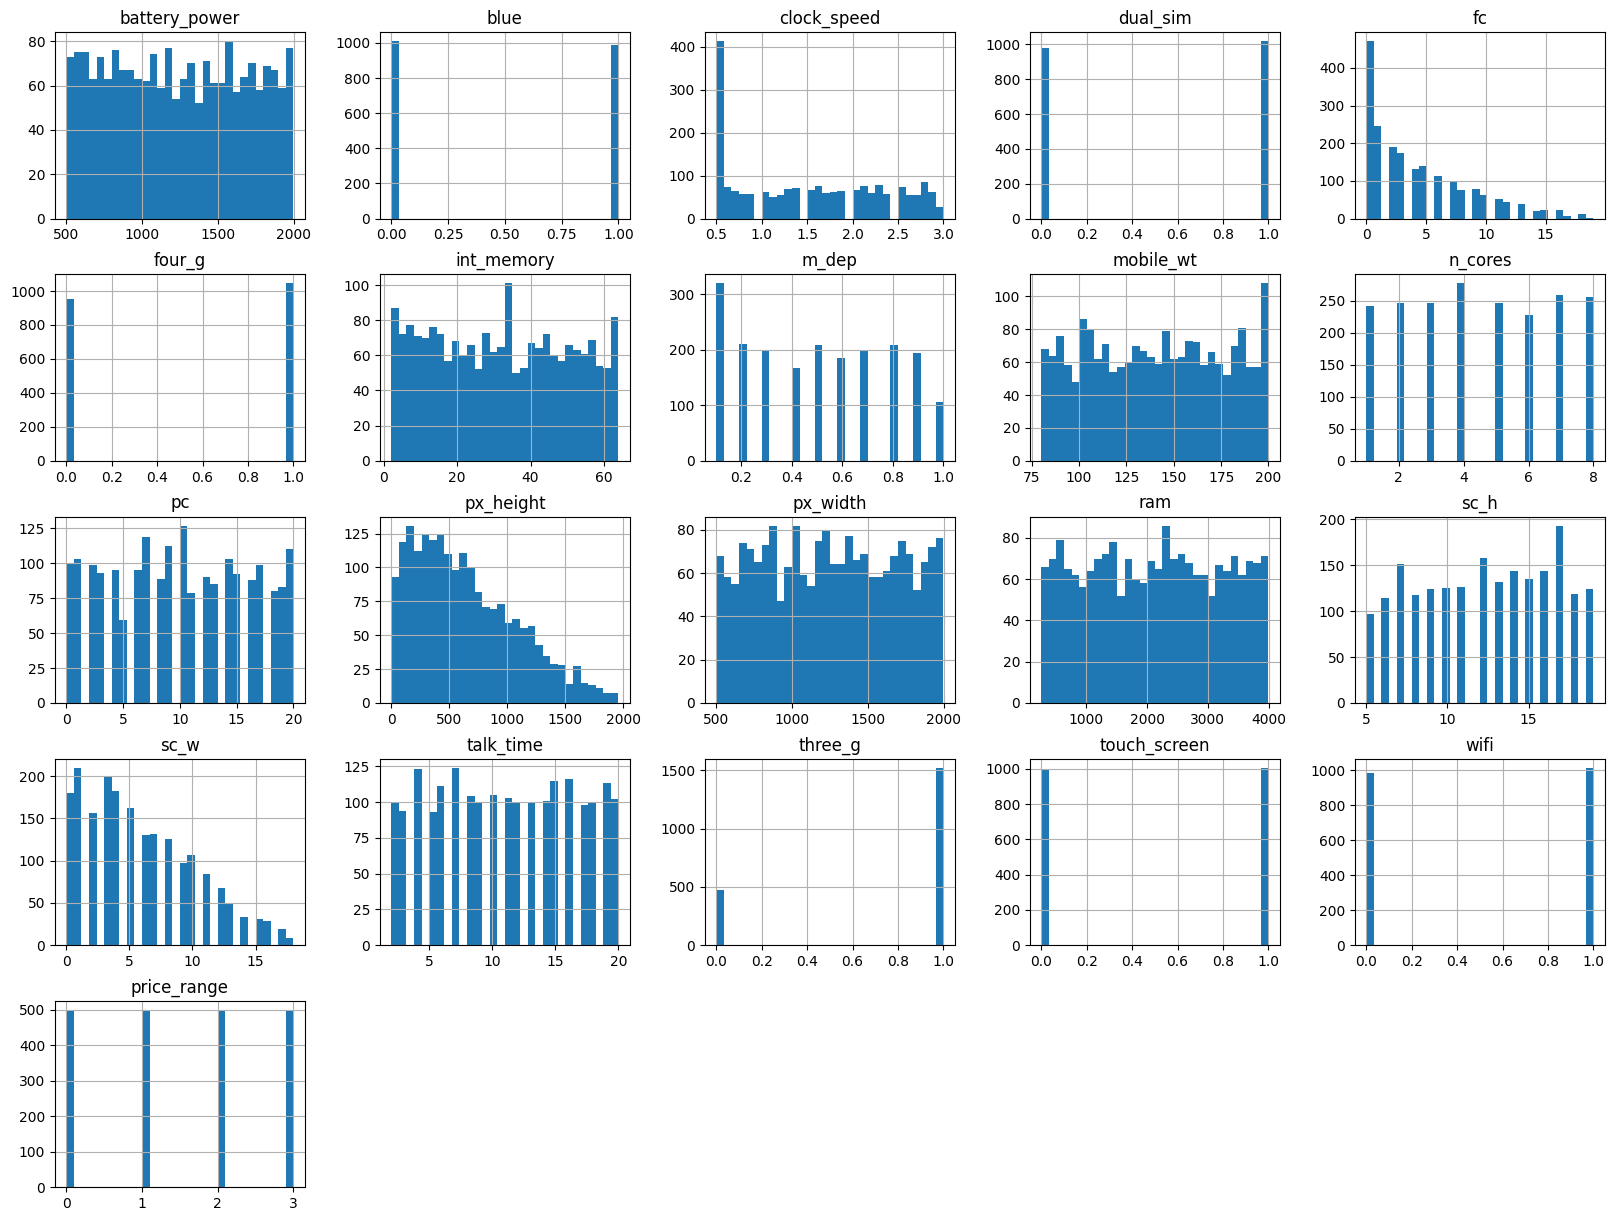

In [10]:
# The histogram plot gives us a quick glimbse on our data values
train.hist(bins=30, figsize=(20, 15))
plt.show()


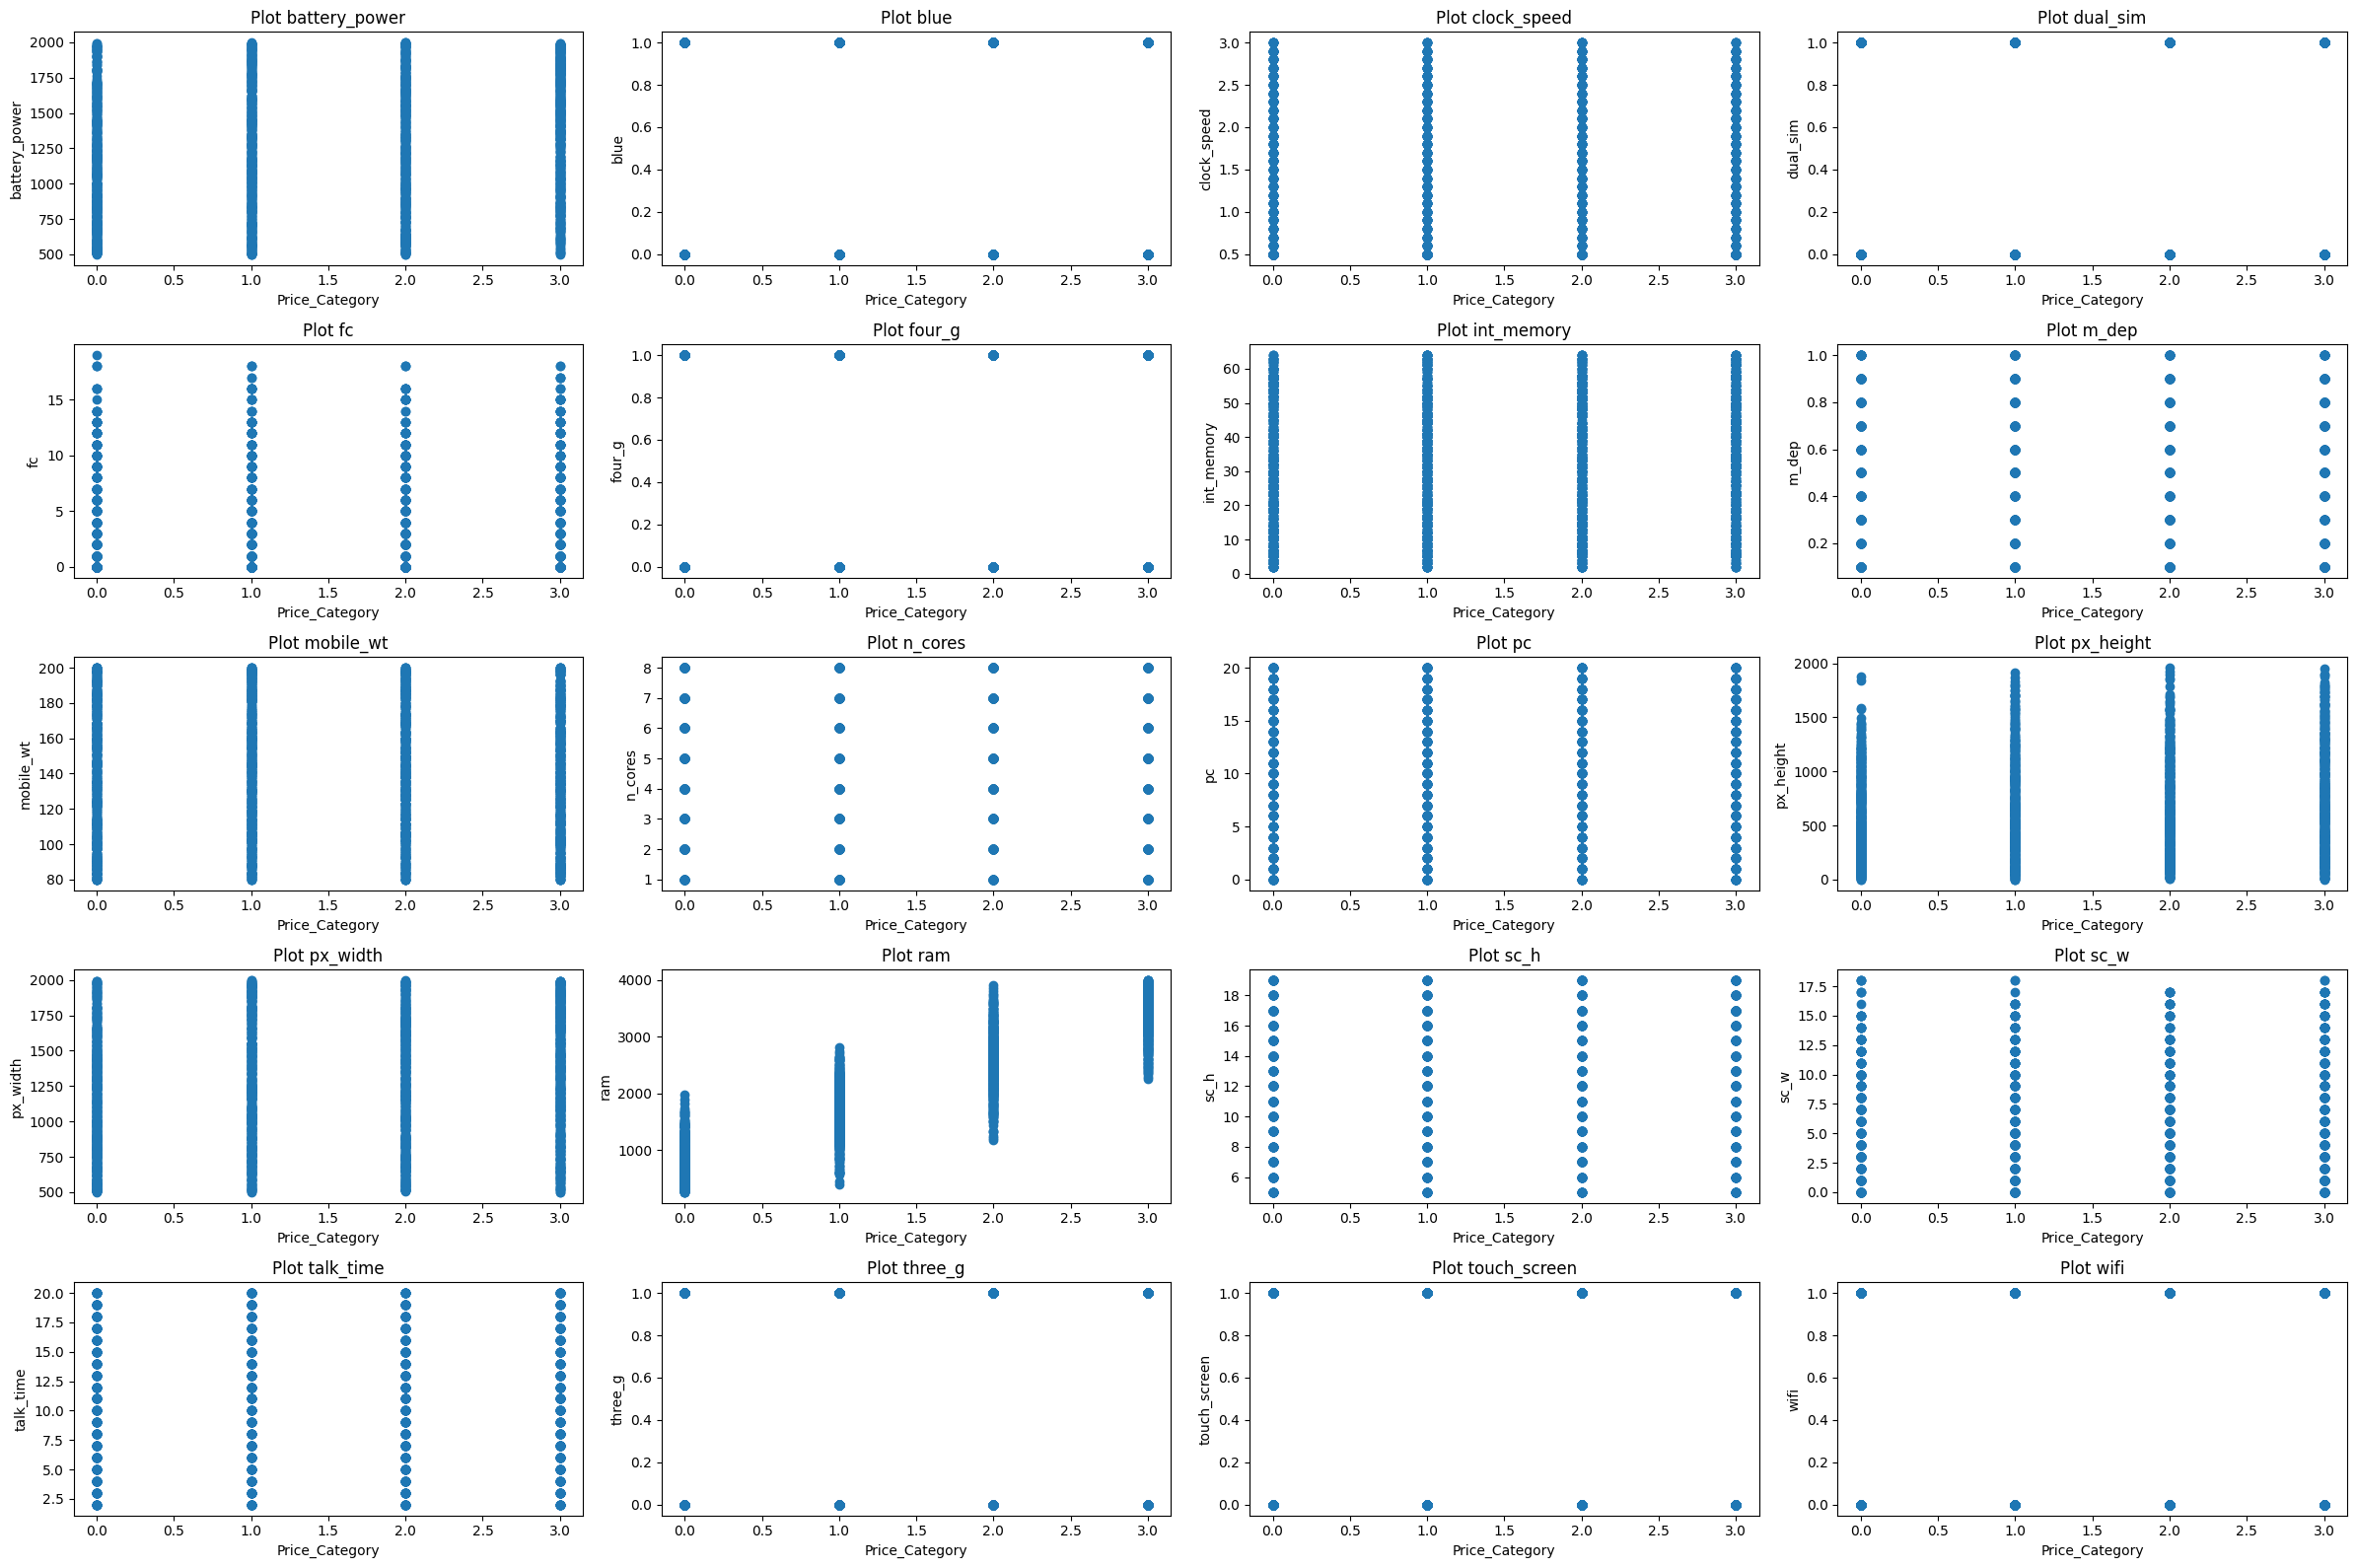

In [11]:
# Create a figure with appropriate size
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 16))  # Adjust rows, cols and figsize as needed

# Flatten the axes for easier iteration
axes_flat = axes.ravel()
columns=train.columns

# Create plots on each subplot
for i in range(20):
  axes_flat[i].scatter(train.price_range,train[columns[i]])
  axes_flat[i].set_title(f"Plot {columns[i]}")
  axes_flat[i].set_ylabel(f'{columns[i]}')
  axes_flat[i].set_xlabel(f'Price_Category')

# Adjust layout (optional)
plt.tight_layout()

plt.show()

We can see here a matching pattern to what we found from the aggregated mean plots.

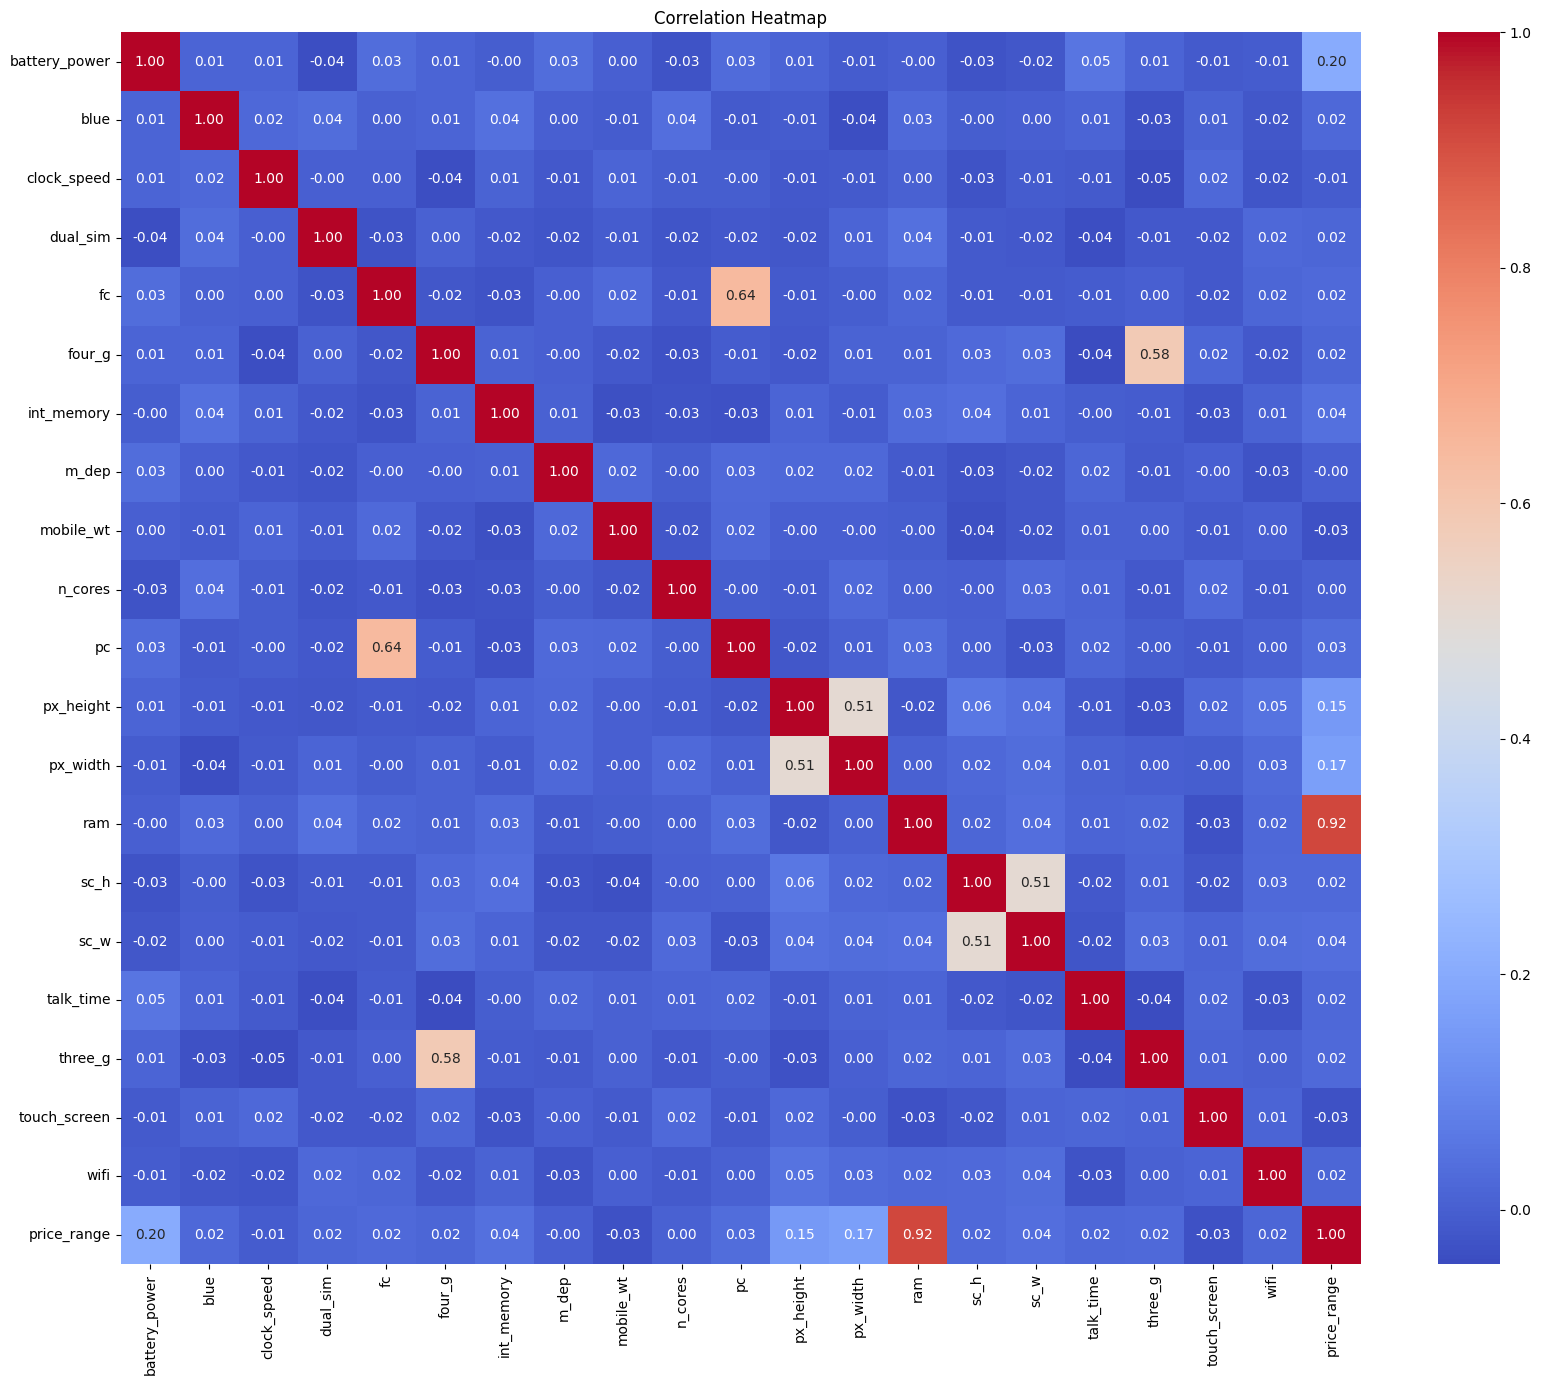

In [12]:
# Creating a heatmap for our data
correlation_matrix = train.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In the correlation heatmap, we can notice strong relationships between:
- Price and RAM
- Screen dimensions and Pixel dimensions
- 3G and 4G

We will make full use of these strong features to enhance the predictive power of our model.

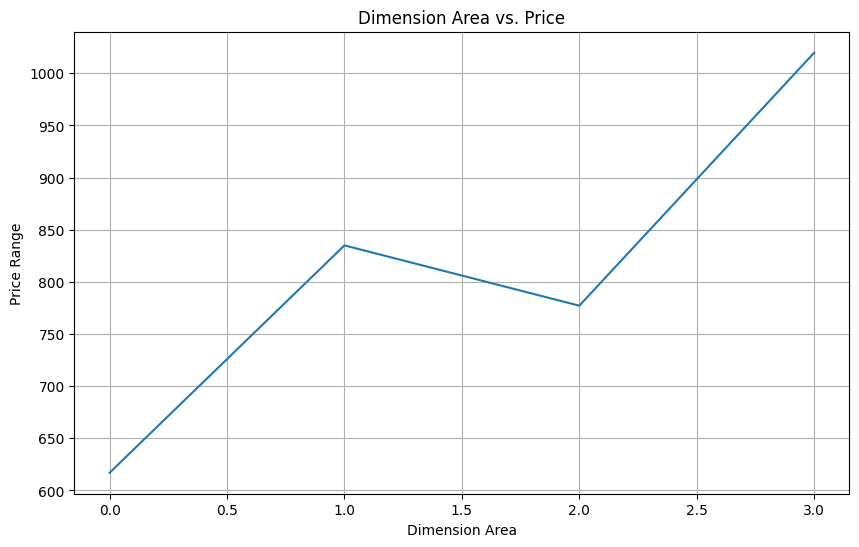

In [13]:
# Creating a new feature area and plotting it against price 
area=(price_mean['px_height']*price_mean['px_width'])/1000
plt.figure(figsize=(10, 6))
area.plot()
plt.title('Dimension Area vs. Price')
plt.xlabel('Dimension Area')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()

We can see that we can use pixel area instead of dimensions as a feature instead.

Overall, we will be dropping the following features due to bad correlation or almost no effect:
- Touch on/off
- Screen height/width
- Mobile weight
- Mobile depth
- Clock speed

By doing this, we keep features that have a stronger effect on the price.


In [14]:
# Dropping the features discussed above
train.drop(['clock_speed','m_dep','sc_w','sc_h','touch_screen','mobile_wt'],axis=1,inplace=True)

In [15]:
# Adding the area feature to replace Pixel dimensions
train['area']=train['px_height']*train['px_width']
train.drop(['px_height','px_width'],axis=1,inplace=True)

In [16]:
# Splitting the Price_range to be used as y_train
y_train=train.price_range
train.drop(['price_range'],axis=1,inplace=True)
train.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,n_cores,pc,ram,talk_time,three_g,wifi,area
0,842,0,0,1.0,0.0,7.0,2.0,2.0,2549.0,19,0,1,15120.0
1,1021,1,1,0.0,1.0,53.0,3.0,6.0,2631.0,7,1,0,1799140.0
2,563,1,1,2.0,1.0,41.0,5.0,6.0,2603.0,9,1,0,2167308.0
3,615,1,0,0.0,0.0,10.0,6.0,9.0,2769.0,11,1,0,2171776.0
4,1821,1,0,13.0,1.0,44.0,2.0,14.0,1411.0,15,1,0,1464096.0


## We can now normalize all our features for better suitablity for models

In [17]:
# Using Scikit Learn we normalize our data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train)
x_train=scaler.fit_transform(train)
train_columns=train.columns
train_columns

Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'n_cores', 'pc', 'ram', 'talk_time', 'three_g', 'wifi', 'area'],
      dtype='object')

## Model Training and Evaluation

In this section, we will train and evaluate multiple machine learning models to determine the most optimal one for our price classification task. The following steps will be performed:

1. **Data Splitting:**
   - Split the dataset into training and testing sets using an 80-20 split.

2. **Model Definition:**
   - Define a set of candidate models, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Machine (SVM).

3. **Model Training and Evaluation:**
   - Train each model on the training set and evaluate its performance on the testing set using metrics such as Accuracy, Precision, Recall, and F1 Score.

4. **Results Display:**
   - Display the evaluation metrics for each model to compare their performance and select the most optimal model.

The code below demonstrates this process:


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Support Vector Machine': SVC(kernel='linear')
}

# Evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print()

Model: Logistic Regression
  Accuracy: 0.9300
  Precision: 0.9310
  Recall: 0.9300
  F1 Score: 0.9303

Model: Decision Tree
  Accuracy: 0.8650
  Precision: 0.8707
  Recall: 0.8650
  F1 Score: 0.8662

Model: Random Forest
  Accuracy: 0.9000
  Precision: 0.9017
  Recall: 0.9000
  F1 Score: 0.9004

Model: Gradient Boosting
  Accuracy: 0.8900
  Precision: 0.8936
  Recall: 0.8900
  F1 Score: 0.8911

Model: Support Vector Machine
  Accuracy: 0.9425
  Precision: 0.9432
  Recall: 0.9425
  F1 Score: 0.9427



We can see that the highest accuracy comes from SVM and Logistic Regression, we will choose **SVM** for our model as it gives an accuracy of > 94%.

Now we will save our Model and our Scaler, so we can safely use the same fitted model and scaler on any input data to accurately predict the price.

In [19]:
# Dumping the model and scaler for later use
from joblib import dump

# Train your SVM model
svm_model = SVC()
# Assuming X_train and y_train are your training data
svm_model.fit(X_train, y_train)


# Save the trained model and fitted scaler to a file
dump(svm_model, 'svm_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

# This Marks the End of This File
We have successfully finished our model.

In this src folder we will also create the following:
- Pipe (Automate data reading processing and prediction)
- App (Flask app to create API that gives ease of use to our model with a storage Database)

In main project folder:
- device_price_api.py (Will run all features of our Flask app)
- README.md (Detailed instruction on the project)